In [67]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
#reading the dataset
df=pd.read_csv('dataframe_.csv')
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [70]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [71]:
#removing the duplicates
df.drop_duplicates(inplace=True,ignore_index=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1090 non-null   float64
 1   output  1090 non-null   float64
dtypes: float64(2)
memory usage: 17.2 KB


In [73]:
df.isnull().sum().sum()

2

In [74]:
df.isnull().sum()

input     1
output    1
dtype: int64

In [75]:
#null values in dataset
df[df['input'].isnull()]

,input,output
1090,NaN,NaN


In [76]:
#dropping the null values
df=df.drop(1090)

In [77]:
#sorting the values in df
df=df.sort_values(by=['input'])

C:\Users\NIVAS\AppData\Local\Programs\Python\Python39\Scripts\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


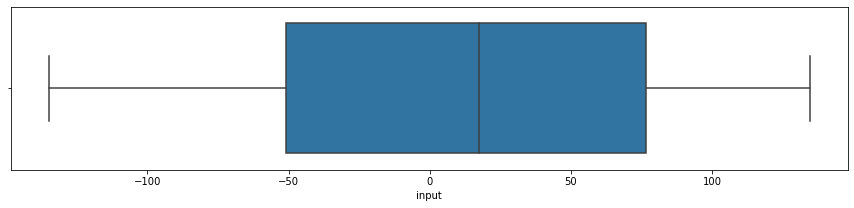

In [78]:
#boxplot of input column 
plt.figure(figsize=(15,3))
sns.boxplot(df['input'])
plt.show()

C:\Users\NIVAS\AppData\Local\Programs\Python\Python39\Scripts\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


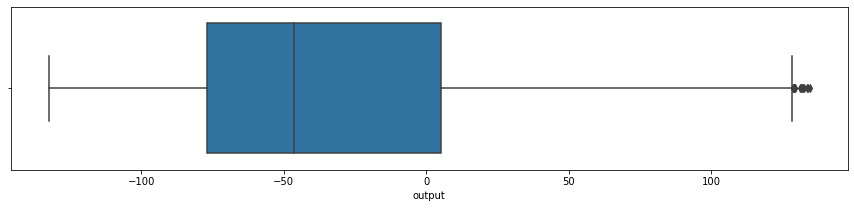

In [79]:
#boxplot of output column 
plt.figure(figsize=(15,3))
sns.boxplot(df['output'])
plt.show()

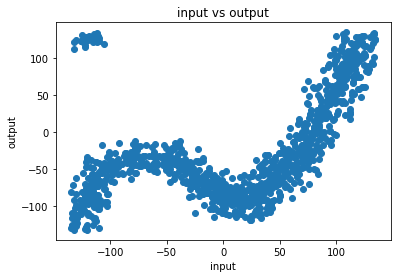

In [80]:
#scatter plot
plt.scatter(df['input'],df['output'])
plt.title('input vs output')
plt.xlabel('input')
plt.ylabel('output')
plt.show()

In [81]:
df.shape

(1090, 2)

In [82]:
#find and remove outliners
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [83]:
df.shape

(1074, 2)

In [84]:
x=df['input']
y=df['output']

In [85]:
x=x.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [86]:
#splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [87]:
#Simple linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [88]:
y_pred = regressor.predict(x_test)

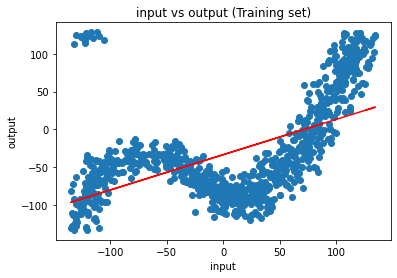

In [89]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regressor.predict(x_train), color = 'red')
plt.title('input vs output (Training set)')
plt.xlabel('input')
plt.ylabel('output')
plt.show()

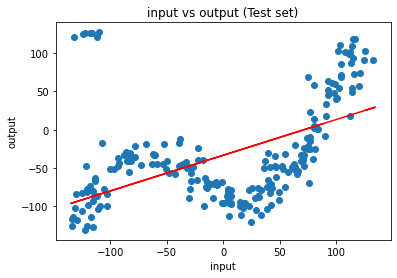

In [90]:
plt.scatter(x_test, y_test)
plt.plot(x_train, regressor.predict(x_train), color = 'red')
plt.title('input vs output (Test set)')
plt.xlabel('input')
plt.ylabel('output')
plt.show()

In [91]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

3557.6457720233093

In [92]:
#polynomial regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

In [93]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
x_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression()

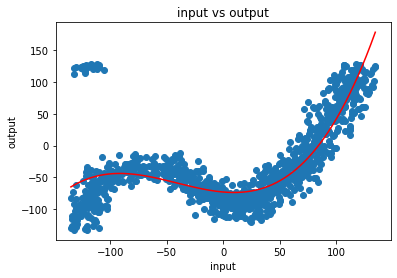

In [94]:
plt.scatter(x, y)
plt.plot(x,  lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'red')
plt.title('input vs output')
plt.xlabel('input')
plt.ylabel('output')
plt.show()

In [95]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(x_test))

In [96]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1784.4800043068285

In [97]:
#support vector regression
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)

C:\Users\NIVAS\AppData\Local\Programs\Python\Python39\Scripts\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

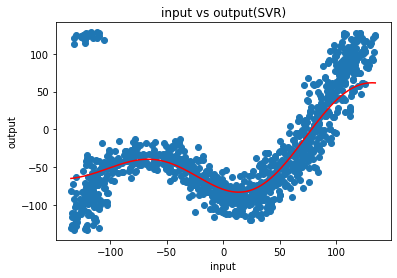

In [98]:
plt.scatter(x, y)
plt.plot(x, regressor.predict(x), color = 'red')
plt.title('input vs output(SVR)')
plt.xlabel('input')
plt.ylabel('output')
plt.show()

In [99]:
y_pred = regressor.predict(x_test)

In [100]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1793.981658492141

In [ ]:
#polynomial regression with degree 3 has given the best results.